Menghao's Jupyter NB: park meter in Neighborhoods

Source: https://data.wprdc.org/dataset/pittsburgh-parking-meters-and-payment-points.My partner and I wanted to travel by car, so we wanted to stay in an area with easy parking. I ended up picking the ten places with the most parking meters.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:

parkingmeters = pd.read_csv('parkingmeters.csv')
parkingmeters

,year_month,id,location,location_type,latitude,longitude,status,zone,all_groups,guid,in_service_utc,as_of
0,2019-06,410168-SCHEDR4402,SCHENLEY DR,On street,40.440574,-79.948103,Removed,410 - Oakland 4,410 - Oakland 4|Z - Inactive/Removed Terminals,EE7C4FB7-038A-461A-A667-002870BA4155,2012-08-27T11:24:43,2019-06-30T02:31:01
1,2019-06,421009-CEDAR-0302,CEDAR AVE,On street,40.451356,-80.001150,Active,421 - NorthSide,NORTHSIDE|421 - NorthSide,5BAC585B-FE5C-4090-ABF8-005D6C670EF1,2013-08-08T11:34:15,2019-06-30T02:31:01
2,2019-06,409242-NDTHRG0106,N DITHRIDGE ST,On street,40.448784,-79.951793,Active,409 - Oakland 3,409 - Oakland 3|OAKLAND3,F4BDCD95-6853-413F-A1C6-009AF3F9D725,2012-09-04T16:08:27,2019-06-30T02:31:01
3,2019-06,PBP412,Virtual Terminal for ParkMobile,Virtual Zone,NaN,NaN,Active,412 - East Liberty,EASTLIB,8FAADCCE-A7BD-4988-85FC-00DCAB30782C,2015-10-23T16:56:58,2019-06-30T02:31:01
4,2019-06,426002-CENTRE1802,CENTRE AVE,On street,40.442621,-79.982096,Active,426 - Hill District,Hill District|426 - Hill District|HILL-DIST,DFCD9083-EE1C-477D-8F82-00F688A1F78C,2017-07-17T11:24:27,2019-06-30T02:31:01
...,...,...,...,...,...,...,...,...,...,...,...,...
14651,2020-05,421097-EOHIO-0302,EAST OHIO ST,On street,40.452984,-80.003084,Active,421 - NorthSide,NORTHSIDE|421 - NorthSide,A3F709B7-E63F-486F-A79C-F93367CCAE62,2017-11-06T15:09:05,2020-05-27T13:00:10
14652,2020-05,406593-LIBRTY4704,LIBERTY AVE,On street,40.461675,-79.949253,Active,406 - Bloomfield (On-street),BLOOMFIELD|406 - Bloomfield (On-street),D295BE2F-DDB1-4EEF-8CF6-F940E99238E2,2012-12-05T13:00:28,2020-05-27T13:00:10
14653,2020-05,406616-FRDSHP4804,FRIENDSHIP AVE,On street,40.462331,-79.945859,Active,406 - Bloomfield (On-street),BLOOMFIELD|406 - Bloomfield (On-street),C5D6B3BB-5380-4FA6-BE1C-F9A20A11B0AA,2012-12-05T13:11:31,2020-05-27T13:00:10
14654,2020-05,412607-CENTRE5804,CENTRE AVE,On street,40.458795,-79.929240,Inactive,412 - East Liberty,EASTLIB|412 - East Liberty|Z - Inactive/Remove...,6AD51CD5-6715-40C7-81FB-F9ED3C2EAAD6,2013-08-13T17:14:50,2020-05-27T13:00:10


In [14]:
zone_counts = parkingmeters.groupby('zone')['id'].count().reset_index(name='count')
zone_counts.sort_values(by='count', ascending=False, inplace=True)
most_parkingmeters_zone = zone_counts.iloc[0]['zone']
#get top 10 zone with most park point
top10 = zone_counts.head(10)
print(top10)

                            zone  count
47                415 - SS & SSW   1232
53               421 - NorthSide   1176
41               409 - Oakland 3   1054
35                  403 - Uptown   1030
38  406 - Bloomfield (On-street)    899
34              402 - Downtown 2    788
36         404 - Strip Disctrict    756
44            412 - East Liberty    741
43               411 - Shadyside    706
45           413 - Squirrel Hill    680


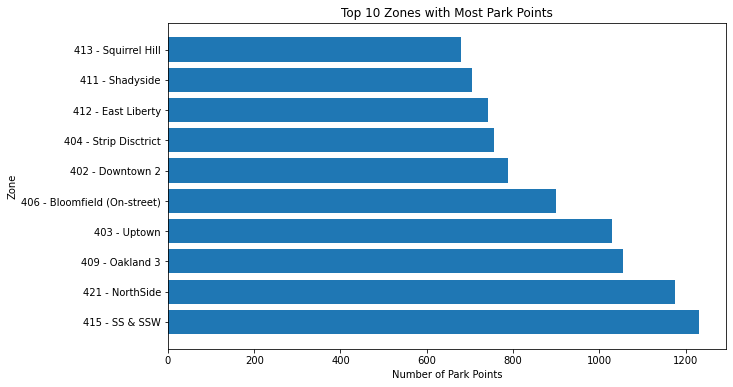

In [15]:
import matplotlib.pyplot as plt

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top10['zone'], top10['count'], align='center')

# set labels and title
ax.set_xlabel('Number of Park Points')
ax.set_ylabel('Zone')
ax.set_title('Top 10 Zones with Most Park Points')

# show the plot
plt.show()
